In [109]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

import env
import acquire

Aquire telco data

In [110]:
df = acquire.get_telco_churn_data()

In [111]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


Change all yes and no, to 1 and 0

In [112]:
df['churn'] = df['churn'].replace('Yes', 1)
df['churn'] = df['churn'].replace('No', 0)

replace odd characters with nans and drop nans

In [113]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df["total_charges"] = df["total_charges"].astype('float')
df = df.dropna()
df = df.drop(columns="customer_id")

Tidy up data by replacing 'No' and 'Yes' with 0 and 1

In [114]:
df.replace(to_replace=['No', 'Yes'], value=[0, 1], inplace=True)
df.replace(to_replace=['No phone service'], value=[0], inplace=True)
df.replace(to_replace=['Female', 'Male'], value=[0, 1], inplace=True)
df.replace(to_replace=['No internet service'], value=[0], inplace=True)
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0,0,1,1,9,1,0,1,0,1,0,1,1,0,2,1,2,65.6,593.30,0
1,1,0,0,0,9,1,1,1,0,0,0,0,0,1,1,0,2,59.9,542.40,0
2,1,0,0,0,4,1,0,2,0,0,1,0,0,0,1,1,1,73.9,280.85,1
3,1,1,1,0,13,1,0,2,0,1,1,0,1,1,1,1,1,98.0,1237.85,1
4,0,1,1,0,3,1,0,2,0,0,0,1,1,0,1,1,2,83.9,267.40,1


Split my data into train and test

In [115]:
train, test = train_test_split(df, test_size = .20, random_state = 123)

train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
5483,1,0,1,0,15,1,0,2,0,0,0,0,0,0,1,1,3,68.6,1108.60,0
5436,1,0,1,0,71,1,1,1,1,1,1,1,0,1,3,1,2,80.1,5585.40,0
3572,0,0,1,1,32,1,0,1,1,1,0,1,0,0,1,0,3,61.4,1864.65,0
2100,1,0,0,1,19,1,0,3,0,0,0,0,0,0,1,1,1,20.0,377.55,0
7019,1,0,0,1,71,1,1,2,1,0,1,0,1,1,3,0,3,106.7,7382.25,0


## Exploring Pre-scaled and pre-encoded data

Compare values on a heat map.  Data will probably need to be scaled and rerun on heatmap.

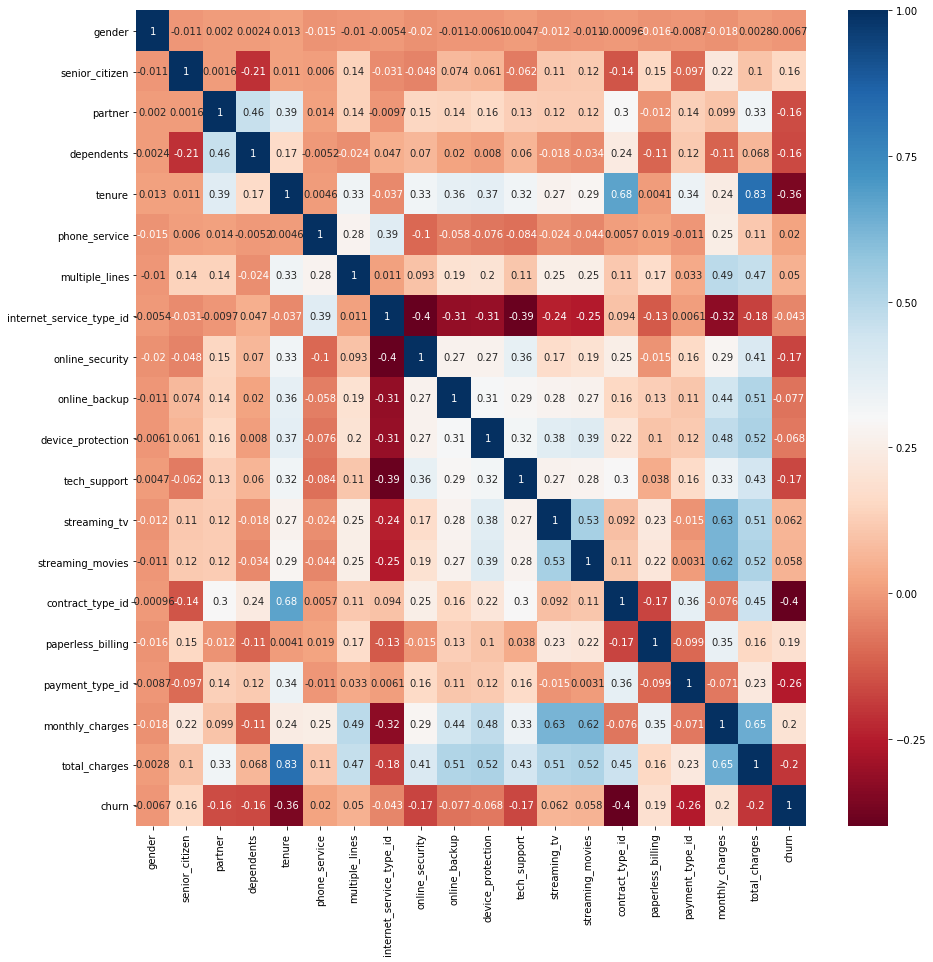

In [116]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(), cmap='RdBu', annot=True)
# plt.ylim(0, 4)

Are there features that indicate a higher propensity to churn? like type of internet service, type of phone service, online security and backup, senior citizens, paying more than x% of customers with the same services, etc.?

In [74]:
df['family'] = (df.partner == 1) | (df.dependents == 1)
df = df.drop(columns=['partner', 'dependents'])

In [75]:
df['has_phone_service'] = (df.phone_service == 1) | (df.multiple_lines == 1)
df = df.drop(columns=['phone_service', 'multiple_lines'])
df.head()

,gender,senior_citizen,tenure,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,family,has_phone_service
0,0,0,9,1,0,1,0,1,1,0,2,1,2,65.6,593.30,0,True,True
1,1,0,9,1,0,0,0,0,0,1,1,0,2,59.9,542.40,0,False,True
2,1,0,4,2,0,0,1,0,0,0,1,1,1,73.9,280.85,1,False,True
3,1,1,13,2,0,1,1,0,1,1,1,1,1,98.0,1237.85,1,True,True
4,0,1,3,2,0,0,0,1,1,0,1,1,2,83.9,267.40,1,True,True


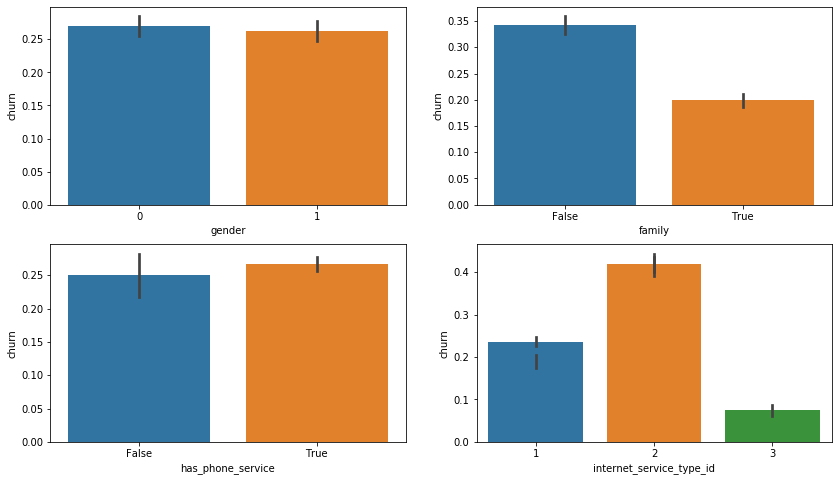

In [76]:
plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
sns.barplot(x="gender", y="churn", data=df)

plt.subplot(2,2,2)
sns.barplot(x="family", y="churn", data=df)

plt.subplot(2,2,3)
sns.barplot(x="has_phone_service", y="churn", data=df)

plt.subplot(2,2,4)
sns.barplot(x="senior_citizen", y="churn", data=df)

plt.subplot(2,2,4)
sns.barplot(x="internet_service_type_id", y="churn", data=df)


## Exploration post-scaled and post encoded

In [77]:
import pandas as pd
import numpy as np
import scipy as sp 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

import env
import acquire
import prepare

In [78]:
df = acquire.get_telco_churn_data()

df = prepare.clean_data(df)

df = prepare.combine_and_clean_variables(df)

X_train, X_test, y_train, y_test = prepare.split_data(df)

X_train, X_test = prepare.encode(X_train, X_test, 'internet_service_type_id')

X_train['DSL'] = X_train[1]
X_train['Fiber Optic'] = X_train[2]
X_train['None'] = X_train[3]

X_test['DSL'] = X_test[1]
X_test['Fiber Optic'] = X_test[2]
X_test['None'] = X_test[3]

X_train = X_train.drop(columns='internet_service_type_id')
X_test = X_test.drop(columns='internet_service_type_id')
X_train = X_train.drop(columns=[1, 2, 3])
X_test = X_test.drop(columns=[1, 2, 3])

X_train, X_test = prepare.encode(X_train, X_test, 'contract_type_id')

X_train['Month-to-Month'] = X_train[1]
X_train['One Year'] = X_train[2]
X_train['Two Year'] = X_train[3]

X_test['Month-to-Month'] = X_test[1]
X_test['One Year'] = X_test[2]
X_test['Two Year'] = X_test[3]

X_train = X_train.drop(columns='contract_type_id')
X_test = X_test.drop(columns='contract_type_id')
X_train = X_train.drop(columns=[1, 2, 3])
X_test = X_test.drop(columns=[1, 2, 3])

X_train, X_test, scaler = prepare.scale_minmax(X_train, X_test, column_list=['tenure', 'monthly_charges', 'total_charges'])

X_train = X_train.drop(columns=['tenure', 'monthly_charges', 'total_charges', 'tenure_years'])
X_test = X_test.drop(columns=['tenure', 'monthly_charges', 'total_charges', 'tenure_years'])

In [88]:
X_train.head()

,gender,senior_citizen,streaming_tv,streaming_movies,has_phone_service,family,security_package,DSL,Fiber Optic,None,Month-to-Month,One Year,Two Year,tenure_scaled,monthly_charges_scaled,total_charges_scaled
5483,1,0,0,0,True,True,False,0.0,1.0,0.0,1.0,0.0,0.0,0.197183,0.500249,0.125756
5436,1,0,0,1,True,True,True,1.0,0.0,0.0,0.0,0.0,1.0,0.985915,0.614848,0.642349
3572,0,0,0,0,True,True,True,1.0,0.0,0.0,1.0,0.0,0.0,0.436620,0.428500,0.212999
2100,1,0,0,0,True,True,False,0.0,0.0,1.0,1.0,0.0,0.0,0.253521,0.015944,0.041397
7019,1,0,1,1,True,True,True,0.0,1.0,0.0,0.0,0.0,1.0,0.985915,0.879920,0.849694


In [91]:
df_train = X_train.join(y_train)

In [93]:
df_train.head()

,gender,senior_citizen,streaming_tv,streaming_movies,has_phone_service,family,security_package,DSL,Fiber Optic,None,Month-to-Month,One Year,Two Year,tenure_scaled,monthly_charges_scaled,total_charges_scaled,churn
5483,1,0,0,0,True,True,False,0.0,1.0,0.0,1.0,0.0,0.0,0.197183,0.500249,0.125756,0
5436,1,0,0,1,True,True,True,1.0,0.0,0.0,0.0,0.0,1.0,0.985915,0.614848,0.642349,0
3572,0,0,0,0,True,True,True,1.0,0.0,0.0,1.0,0.0,0.0,0.436620,0.428500,0.212999,0
2100,1,0,0,0,True,True,False,0.0,0.0,1.0,1.0,0.0,0.0,0.253521,0.015944,0.041397,0
7019,1,0,1,1,True,True,True,0.0,1.0,0.0,0.0,0.0,1.0,0.985915,0.879920,0.849694,0


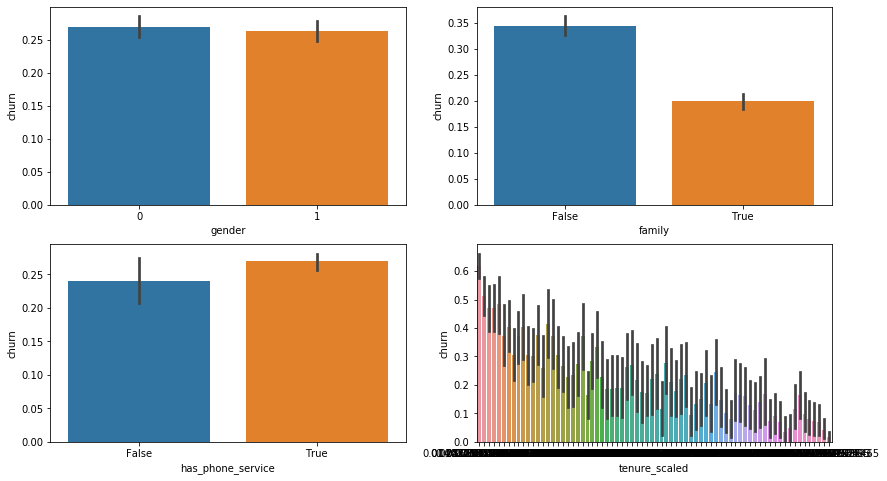

In [95]:
plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
sns.barplot(x="gender", y="churn", data=df_train)

plt.subplot(2,2,2)
sns.barplot(x="family", y="churn", data=df_train)

plt.subplot(2,2,3)
sns.barplot(x="has_phone_service", y="churn", data=df_train)

plt.subplot(2,2,4)
sns.barplot(x="tenure_scaled", y="churn", data=df_train)

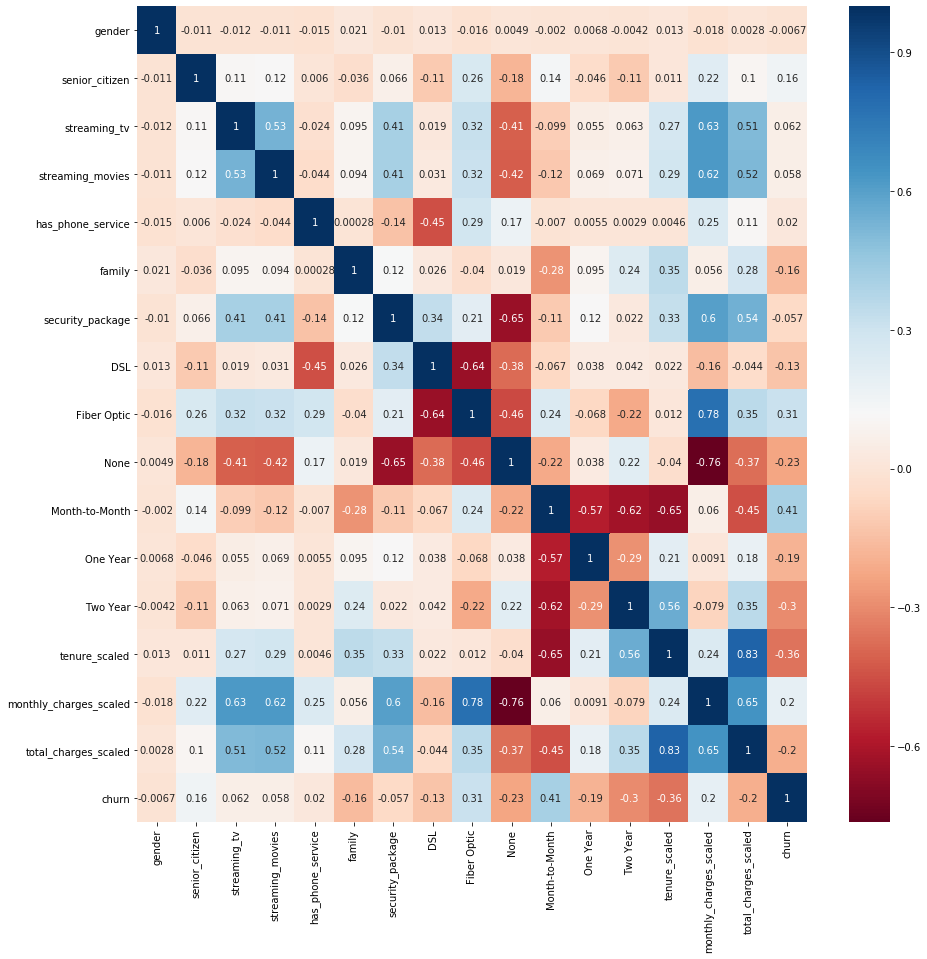

In [96]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(), cmap='RdBu', annot=True)